# Time series analysis

In [24]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX as sarimax

In [6]:
ts = pd.read_csv("data/consumption.csv", parse_dates=True, index_col=0)
ts.index.freq = "QS"
assert(ts.shape == (164, 1))
assert(type(ts.index) is pd.core.indexes.datetimes.DatetimeIndex)

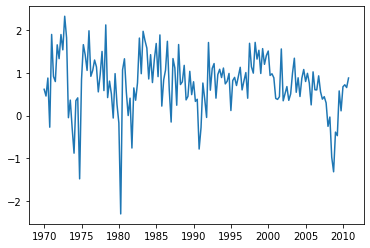

In [12]:
plt.plot(ts)

## Augmented Dickey-Fuller statistical test

In [15]:
test = adfuller(ts.V1, autolag='AIC')
pvalue = test[1]
print(pvalue)

0.0005165365491351624


The p-value is less than $10^3$. The null hypothesis(a unit root is present) is rejected with strong confidence. The time series is then stationary

## Autocorrelation and Partial Autocorrelation

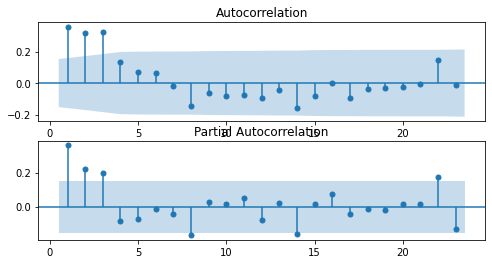

In [19]:
fig, ax = plt.subplots(2, figsize=(8, 4))
a = plot_acf(ts, zero=False, ax=ax[0])
b = plot_pacf(ts, zero=False, ax=ax[1])

In both cases the first three lags are significant. This leads us to propose the models AR(3) and MA(3) models.

## teat train split

In [23]:
ts_train = ts[:"1997-01-01"]
ts_test = ts["1997-01-01":]

In [26]:
model = sarimax(ts_train, order=(3, 0, 0))
model_fit = model.fit()

In [27]:
model_test = sarimax(ts, order=(3, 0, 0))
model_test_res = model_test.filter(model_fit.params)
pred = model_test_res.get_prediction(start="1997-01-01")
pred_ci = pred.conf_int()

<AxesSubplot:>

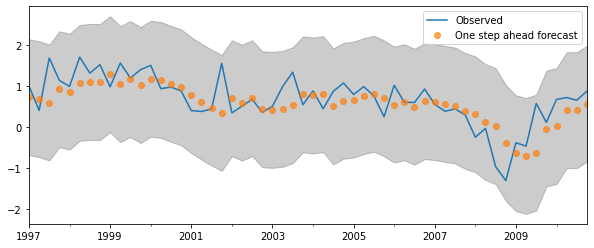

In [28]:
ax = ts_test.plot(y="V1", label="Observed", figsize=(10, 4))
pred.predicted_mean.plot(ax=ax, label="One step ahead forecast", alpha=0.7, linestyle='', marker='o')
ax.fill_between(pred_ci.index, pred_ci['lower V1'], pred_ci['upper V1'], color="k", alpha=0.2)
plt.legend()

In [29]:
mse = np.mean((pred.predicted_mean - ts_test.V1)**2)

In [34]:
model = sarimax(ts_train, order=(0, 0, 3))
model_fit = model.fit()
model_test = sarimax(ts, order=(0, 0, 3))
model_test_res = model_test.filter(model_fit.params)
pred = model_test_res.get_prediction(start="1997-01-01")
mse = np.mean((pred.predicted_mean - ts_test.V1)**2)
mse

0.28458822916381804